### Siamese Network là gì?

**Siamese Network** là một loại mạng nơ-ron nhân tạo được thiết kế để giải quyết các bài toán so sánh và nhận diện sự tương đồng giữa các cặp đầu vào. Điểm đặc biệt của mạng này là hai (hoặc nhiều) nhánh mạng chia sẻ cùng một bộ trọng số, từ đó học được các đặc trưng tương đồng và khác biệt giữa các cặp dữ liệu. Siamese Network được giới thiệu bởi Bromley và LeCun vào năm 1993, và đã trở nên phổ biến trong nhiều ứng dụng, đặc biệt là trong nhận diện khuôn mặt và one-shot learning.

### Cấu trúc của Siamese Network

1. **Input Pairs:** Mạng nhận vào một cặp dữ liệu (x1, x2).
2. **Shared Weights:** Hai nhánh mạng có cấu trúc giống hệt nhau và chia sẻ cùng một bộ trọng số. Điều này đảm bảo rằng cả hai đầu vào đều được biểu diễn trong cùng một không gian đặc trưng.
3. **Feature Extraction:** Mỗi nhánh mạng trích xuất các đặc trưng từ đầu vào của nó. Các đặc trưng này sau đó được so sánh để đo lường sự tương đồng.
4. **Similarity Measure:** Kết quả của mỗi nhánh mạng (embedding vectors) được đưa vào một hàm đo lường sự tương đồng, chẳng hạn như khoảng cách Euclidean hoặc khoảng cách Cosine.
5. **Loss Function:** Mạng được huấn luyện để giảm thiểu sự khác biệt giữa các cặp dữ liệu tương đồng và tăng sự khác biệt giữa các cặp dữ liệu khác biệt. Contrastive loss là một hàm mất mát phổ biến cho mục đích này.

### Hàm mất mát Contrastive Loss

Contrastive loss là một hàm mất mát phổ biến trong các mạng Siamese, giúp mạng học cách phân biệt giữa các cặp dữ liệu tương đồng và khác biệt. Công thức của contrastive loss như sau:
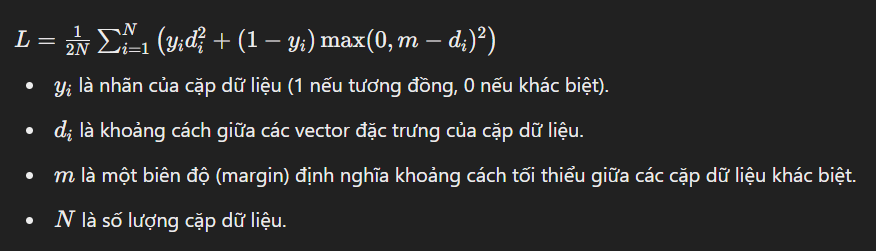
### Ứng dụng của Siamese Network

1. **Nhận diện khuôn mặt:** So sánh khuôn mặt của một người với các khuôn mặt trong cơ sở dữ liệu để xác định hoặc xác thực danh tính.
2. **One-shot Learning:** Học cách phân loại đối tượng chỉ từ một số ít mẫu.
3. **Nhận diện chữ viết tay:** So sánh các ký tự viết tay để xác định chữ cái hoặc số.
4. **Tìm kiếm ảnh:** Tìm các hình ảnh tương tự trong một cơ sở dữ liệu lớn dựa trên một hình ảnh đầu vào.

### Ưu điểm và nhược điểm của Siamese Network

#### Ưu điểm

1. **Hiệu quả trong việc học từ ít dữ liệu:** Mạng Siamese rất mạnh mẽ trong các bài toán mà dữ liệu huấn luyện khan hiếm.
2. **Chia sẻ trọng số:** Giúp giảm số lượng tham số cần học và cải thiện khả năng tổng quát hóa.
3. **Linh hoạt:** Có thể áp dụng cho nhiều loại dữ liệu khác nhau như hình ảnh, văn bản, và âm thanh.

#### Nhược điểm

1. **Tốn kém về tính toán:** So sánh tất cả các cặp dữ liệu có thể rất tốn kém, đặc biệt khi kích thước tập dữ liệu lớn.
2. **Đòi hỏi sự thiết kế tỉ mỉ:** Việc chọn lựa các đặc trưng và hàm đo lường sự tương đồng phù hợp là rất quan trọng và có thể phức tạp.

### Tổng kết

Siamese Network là một công cụ mạnh mẽ cho các bài toán yêu cầu so sánh và nhận diện sự tương đồng giữa các cặp dữ liệu. Nhờ vào khả năng học từ ít dữ liệu và tính linh hoạt, nó đã được áp dụng rộng rãi trong nhiều lĩnh vực khác nhau. Tuy nhiên, việc triển khai và tối ưu hóa mạng Siamese đòi hỏi kiến thức sâu rộng về deep learning và kỹ năng lập trình.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Define the base network to be shared (Siamese Network)
def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (10,10), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (7,7), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (4,4), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(256, (4,4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='sigmoid')(x)
    return Model(input, x)

# Input shape
input_shape = (105, 105, 1)

# Create the base network
base_network = create_base_network(input_shape)

# Create the inputs
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# Get the feature vectors for the inputs
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Define the distance metric
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Compute the Euclidean distance between the vectors
distance = Lambda(euclidean_distance, output_shape=lambda x: x[0])([processed_a, processed_b])

# Create the model
model = Model([input_a, input_b], distance)

# Compile the model
model.compile(loss='contrastive_loss', optimizer='adam')

# Summary of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 105, 105, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 105, 105, 1  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 4096)         38947648    ['input_2[0][0]',                
                                                                  'input_3[0][0]']          